# HW 3

Using numerical simulations for the SIR differential equations, generate time histories for the SIR model for various values of β, γ, and N. You should choose a couple of values of each, run the simulations, and then explain the plots focusing on initial growth of the infection and steady state values of S and R. Interpret results in terms of R0. Submit the plots and your explanations, or a Jupyter notebook that generates the plots and presents your explanations.

Unless you have experience in using numerical solutions to differential equations, use Euler integration. I've shared example code on the discord channel that you can use. I'll be grading your interpretations for the results produced by the code.

Euler integration is a simple method for numerically approximating the solution to a differential equations-family. Suppose that I have a single differential equation: 

$$\dfrac{dx}{dt} = f(x)$$

Euler integration acts as if f(x) is constant for small periods of time:

$$x(t + \Delta t) \approx x(t) + \Delta t \dfrac{dx}{dt} = x(t) + \Delta t f(x)$$

In [1]:
from SIR_via_Euler import SIR_via_Euler
import matplotlib.pyplot as plt

In [2]:
N = 1000        # Population size
beta = .4       # Play with .2, .4, .8, .99 in class
gamma = .1      # Rate at which infectious individuals recover
dt = 0.1        # Numerical integration time step
duration = 140  # Simulation duration 

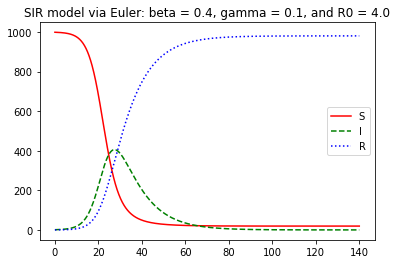

In [3]:
SIR_via_Euler(N, beta, gamma, dt, duration)

### Changing $\beta$

$\beta$ is defined as $\beta = mp$ where $m$ is the number of contacts per person per day and $p$ is the probability of transmission given a susceptible person meets an infectious person. From this, $\beta$ can be interpreted as the rate of flow from susceptible to infectious. Therefore, as $\beta$ increases, we expect to to see the infectious curve to become sharper as the people become infected more quickly. This appears to be the case in the figures below.

We also expect to the S curve to converge to a lower steady state as $\beta$ increases. This is because as the disease becomes more infectious, susceptible people are exposed to the disease more and therefore there are fewer chances of dodging the disease. This agrees with the plots because we see that the S curve converges to 0 when $\beta > .8$.

A similar story can be told about the R curve as all of the population eventually recovers and converges at 1000 when $\beta$ is large.

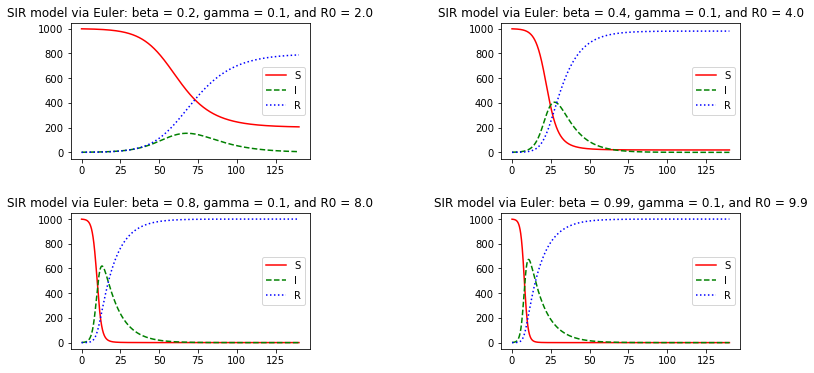

In [5]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
Values = [(0.2,0.1), (0.4,0.1), (0.8,0.1), (0.99,0.1)]
for i in range(len(Values)):
    ax = eval(f'ax{i+1}')
    beta,gamma = Values[i]
    SIR_via_Euler(N, beta, gamma, dt, duration, ax=ax)

plt.subplots_adjust(hspace=0.4, wspace=0.8)
plt.show()

### Changing $\gamma$

$\gamma$ represents the rate of flow from infectious to recovered. When $\gamma$ is small, the rate from infectious to recovered is slow which means people are infectious longer. This means that susceptible people will have more opportunity to become infected as $\gamma$ decreases.

For these plots, I decrease $\gamma$ to observe the effects. When $\gamma$ is large, the I curve is almost flat because people recover before they have time to infect other people.  As $\gamma$ decreases the I curve experiences exponential growth. However, because of the slow recovery rate, the I curve has a long tail. This causes the R curve to converge very slowly even though the S curve converges normally. 

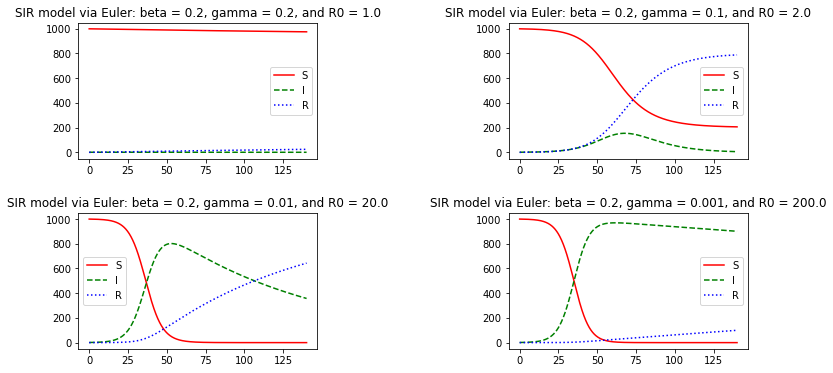

In [8]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
Values = [(0.2,0.2), (0.2,0.1), (0.2,0.01), (0.2,0.001)]
for i in range(len(Values)):
    ax = eval(f'ax{i+1}')
    beta,gamma = Values[i]
    SIR_via_Euler(N, beta, gamma, dt, duration, ax=ax)

plt.subplots_adjust(hspace=0.4, wspace=0.8)
plt.show()

### Changing $\beta \gamma$ keeping R0 constant

Because $R_0 = \dfrac{\beta} { \gamma}$, we might expect to see similar behavior in the graphs as $\beta$ and $\gamma$ appear to cancel each other out. However, we observe that the I curve shifts to the left in the graphs below. When $\beta$ is small, the I curve must grow slowly and causes the right shift. When $\gamma$ is small, people are infectious for a long time and this causes a long tail. As $\beta$ increases, the curves shift to the left because people are infected more easily. This is balanced by the larger $\gamma$ which has people recover more quickly.

Overall, we notice that the S and R curves converge to same values when $R_0$ remains constant. The peak of the I curve is also the same. The only difference is how quickly the I curve peaks and the S/R cuves converge. 

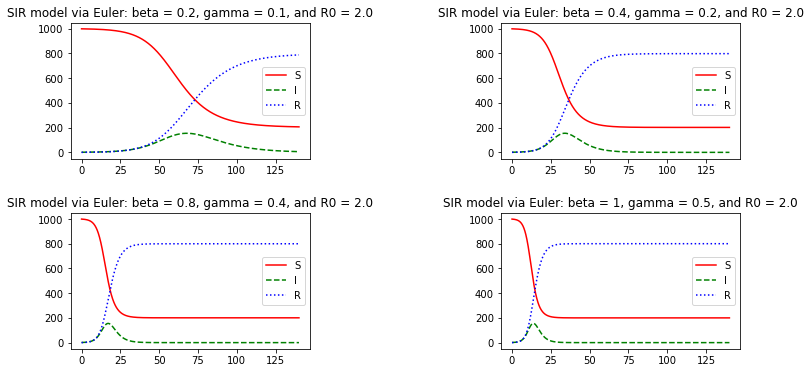

In [7]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
Values = [(0.2,0.1), (0.4,0.2), (0.8,0.4), (1,0.5)]
for i in range(len(Values)):
    ax = eval(f'ax{i+1}')
    beta,gamma = Values[i]
    SIR_via_Euler(N, beta, gamma, dt, duration, ax=ax)

plt.subplots_adjust(hspace=0.4, wspace=0.8)
plt.show()